In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("D:/Downloads/Zomato.csv")

In [6]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [67]:
data.shape

(209999, 26)

In [68]:
data.drop_duplicates(['res_id'],keep='first', inplace=True)
data.shape

(55062, 26)

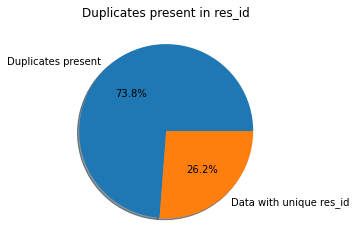

In [69]:
res_id1= np.array([(211944-55568), 55568])
res_id2= ['Duplicates present', 'Data with unique res_id']
plt.pie(res_id1, labels = res_id2, autopct='%1.1f%%', shadow=True)
plt.title("Duplicates present in res_id")
plt.show() 

In [16]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44177
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1002
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [17]:
data.count()

res_id                  55062
name                    55062
establishment           55062
url                     55062
address                 55044
city                    55062
city_id                 55062
locality                55062
latitude                55062
longitude               55062
zipcode                 10885
country_id              55062
locality_verbose        55062
cuisines                54592
timings                 54060
average_cost_for_two    55062
price_range             55062
currency                55062
highlights              55062
aggregate_rating        55062
rating_text             55062
votes                   55062
photo_count             55062
opentable_support       55050
delivery                55062
takeaway                55062
dtype: int64

In [18]:
print(data["name"].unique())
print(data["name"].nunique())

['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Delicacy Restaurant & Banquet' 'New Millennium Restaurant'
 'Aavkar Restaurant']
40796


In [19]:
#print(data[data['name']=='# Wednesday'])
data['name'].value_counts()

Domino's Pizza                                   397
Cafe Coffee Day                                  308
KFC                                              204
Baskin Robbins                                   200
Keventers                                        187
                                                ... 
Modern A Complete Family Restaurant Cum Dhaba      1
New D Dhaba                                        1
Brahmaputra Dhaba                                  1
Nanda Bhog Dhaba                                   1
Aavkar Restaurant                                  1
Name: name, Length: 40796, dtype: int64

Domino's Pizza     397
Cafe Coffee Day    308
KFC                204
Baskin Robbins     200
Keventers          187
Subway             175
Pizza Hut          125
McDonald's         124
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64
DH's Food Express                                1
Masala Box                                       1
Hotel Trishul                                    1
The Noodle Bowl                                  1
New Gobinda Dhaba                                1
Modern A Complete Family Restaurant Cum Dhaba    1
New D Dhaba                                      1
Brahmaputra Dhaba                                1
Nanda Bhog Dhaba                                 1
Aavkar Restaurant                                1
Name: name, dtype: int64
True     35951
False     4845
Name: name, dtype: int64


Text(0.5, 1.0, 'Top 10 outlets on zomato')

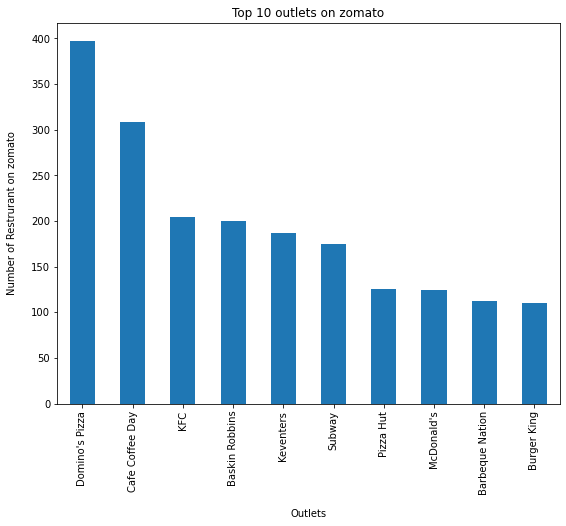

In [20]:
outlet= (data['name'].value_counts()).head(10)
print(outlet)
print((data['name'].value_counts()).tail(10))
print((data['name'].value_counts()==1).value_counts())


outlet.plot(kind='bar', figsize=(9, 7))
plt.xlabel("Outlets", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Top 10 outlets on zomato")

True     35951
False     4845
Name: name, dtype: int64
False    37960
True      2836
Name: name, dtype: int64
False    38787
True      2009
Name: name, dtype: int64


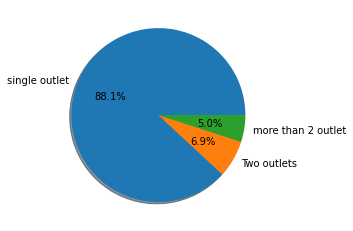

In [21]:
print((data['name'].value_counts()==1).value_counts())
print((data['name'].value_counts()==2).value_counts())
print((data['name'].value_counts()>2).value_counts())

low_outlet= np.array([36210, 2845, 2045])
y1= ['single outlet','Two outlets', 'more than 2 outlet']
plt.pie(low_outlet, labels = y1, autopct='%1.1f%%', shadow=True)
plt.show() 

["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
27
Domino's Pizza                362
KFC                           186
Subway                        160
McDonald's                    113
Burger King                   100
                             ... 
Hunger Maggi Point              1
Suruchi Biryani House           1
Hotel Mukarram                  1
Gulf Bakers And Restaurant      1
Legends Of Punjab               1
Name: name, Length: 11100, dtype: int64


Text(0.5, 1.0, 'Top 10 Restrurant having quick bites establishment')

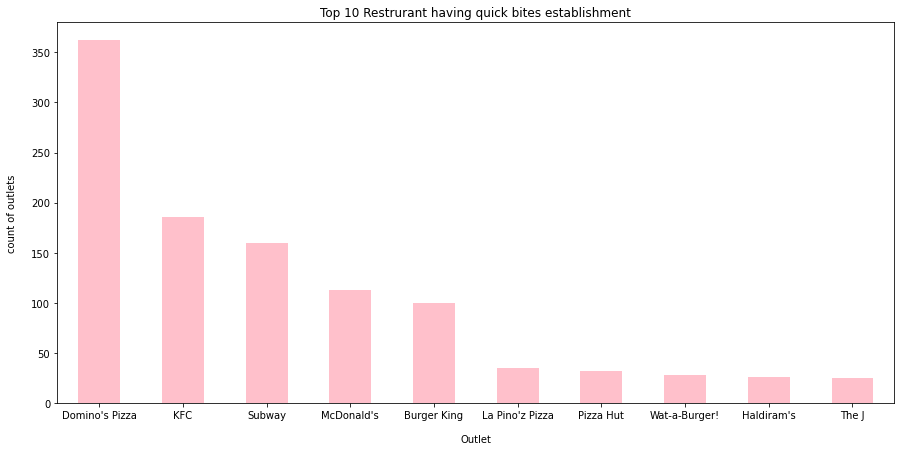

In [22]:
print(data['establishment'].unique())
print(data['establishment'].nunique())
print(((data.loc[data['establishment']=="['Quick Bites']", 'name']).value_counts()))
(((data.loc[data['establishment']=="['Quick Bites']", 'name']).value_counts()).head(10)).plot(kind='bar', figsize=(15, 7), rot=0, color='pink')
plt.xlabel("Outlet", labelpad=14)
plt.ylabel("count of outlets", labelpad=14)
plt.title("Top 10 Restrurant having quick bites establishment")

In [23]:
data['establishment'].value_counts()

['Quick Bites']        13941
['Casual Dining']      12257
['Café']                4042
['Bakery']              3657
['Dessert Parlour']     3596
['Sweet Shop']          2582
['Beverage Shop']       2408
[]                      1828
['Fine Dining']         1535
['Food Court']          1452
['Bar']                 1399
['Dhaba']               1278
['Kiosk']               1107
['Food Truck']           854
['Lounge']               820
['Bhojanalya']           625
['Mess']                 361
['Pub']                  357
['Paan Shop']            317
['Confectionery']        216
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 20
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: establishment, dtype: int64

Text(0.5, 1.0, 'Percentage of different establishment used by restrurants')

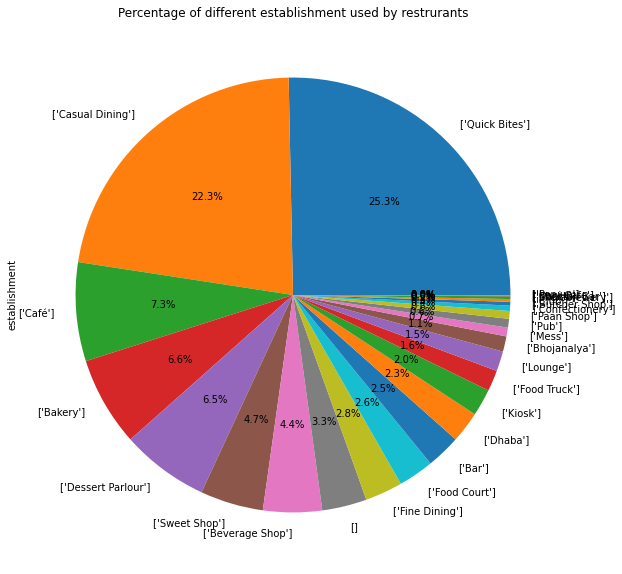

In [24]:
(data['establishment'].value_counts()).plot(kind='pie',autopct='%1.1f%%', figsize=(25,10) )
plt.title("Percentage of different establishment used by restrurants")

<AxesSubplot:title={'center':'Highly rated establishment'}, xlabel='Establishments', ylabel='Average rating'>

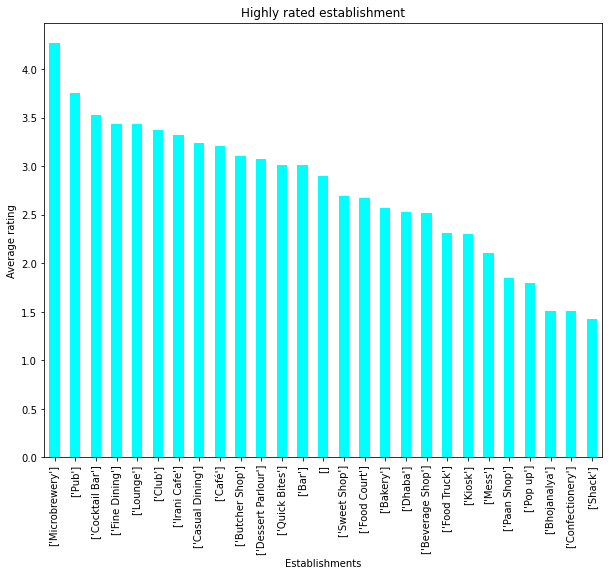

In [25]:
rating_by_est = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)
rating_by_est.plot(kind='bar', color='cyan', figsize=(10,8), title='Highly rated establishment', xlabel='Establishments', ylabel='Average rating')

In [26]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [27]:
len(data["city"].unique())

99

Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Jaipur       1395
Kolkata      1361
Ahmedabad    1247
Goa          1150
Lucknow      1135
Name: city, dtype: int64


Text(0.5, 1.0, 'Number of Restrurant available on zomato per city')

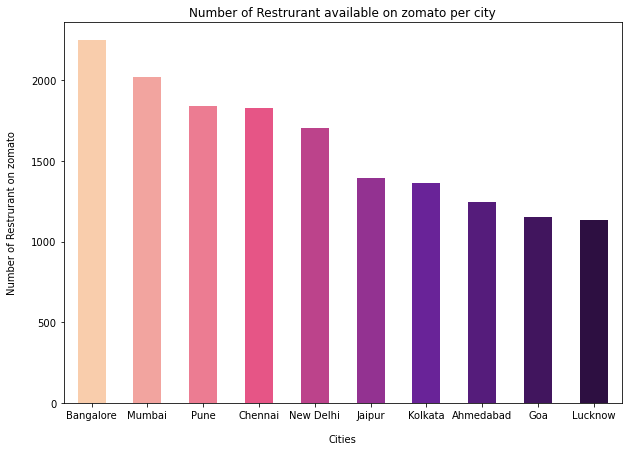

In [28]:
#print(data['city'].value_counts())
print((data['city'].value_counts()).head(10))

((data['city'].value_counts()).head(10)).plot(kind='bar', figsize=(10, 7), rot=0, color= ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]);
plt.xlabel("Cities", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Number of Restrurant available on zomato per city")

#print((data['city'].value_counts()).tail(10))

In [29]:
print(data["locality"].unique())
print(data["locality"].nunique())
print(data["locality"].value_counts())
#print(min(data["locality"]))

['Khandari' 'Agra Cantt' 'Shahganj' ... 'Hotel Kalyan, Sayajigunj'
 'Madhavpura' 'Hotel Express Towers, Alkapuri']
3728
Civil Lines                       752
Model Town                        447
Shastri Nagar                     392
Vijay Nagar                       380
Gomti Nagar                       274
                                 ... 
Hotel Mercure, Lavasa               1
Meerpet                             1
Parc Estique, Viman Nagar           1
Begum Bazaar                        1
Hotel Express Towers, Alkapuri      1
Name: locality, Length: 3728, dtype: int64


44177


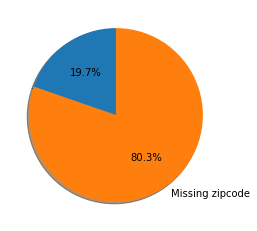

In [30]:
print((data['zipcode']).isnull().sum())

y = np.array([10945, 44623])
mylabels = ["", "Missing zipcode"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show() 

In [31]:
print(data["country_id"].unique())
print(data["country_id"].nunique())


[1]
1


In [32]:
print(data['cuisines'].unique())
print(data['cuisines'].nunique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ... 'Chinese, North Indian, Italian, Thai'
 'North Indian, Bakery, South Indian, Continental, Fast Food, Chinese'
 'Mughlai, Chinese, Biryani']
9355


In [33]:
data['cuisines']=data['cuisines'].fillna("no cuisines")

Total number of unique cuisines =  134
['North Indian' 'South Indian' 'Mithai' 'Street Food' 'Desserts' 'Mughlai'
 'Rolls' 'Chinese' 'Fast Food' 'Bakery' 'Continental' 'Italian' 'Pizza'
 'Cafe' 'Burger' 'Wraps' 'Beverages' 'Rajasthani' 'Mexican' 'Healthy Food'
 'Sandwich' 'Salad' 'Momos' 'Lebanese' 'Mediterranean' 'Thai' 'Gujarati'
 'Indian' 'Finger Food' 'European' 'Tea' 'Asian' 'Bar Food' 'Kebab' 'Paan'
 'Biryani' 'Juices' 'Ice Cream' 'Japanese' 'Korean' 'Afghan' 'Awadhi'
 'no cuisines' 'Hyderabadi' 'Lucknowi' 'Roast Chicken' 'Drinks Only'
 'Coffee' 'American' 'BBQ' 'Maharashtrian' 'Modern Indian' 'Andhra'
 'Konkan' 'Kerala' 'Sushi' 'Parsi' 'Greek' 'Bengali' 'Seafood'
 'Frozen Yogurt' 'Arabian' 'Indonesian' 'Sindhi' 'Hot dogs' 'Goan'
 'Charcoal Chicken' 'Raw Meats' 'Grill' 'Malwani' 'Cantonese' 'Pakistani'
 'Steak' 'Vietnamese' 'Singaporean' 'Middle Eastern' 'British' 'French'
 'Burmese' 'Kashmiri' 'Mangalorean' 'Malaysian' 'Tex-Mex' 'Spanish'
 'Chettinad' 'Tibetan' 'German' 'Belgian

Text(0.5, 1.0, 'Top 5 cuisines')

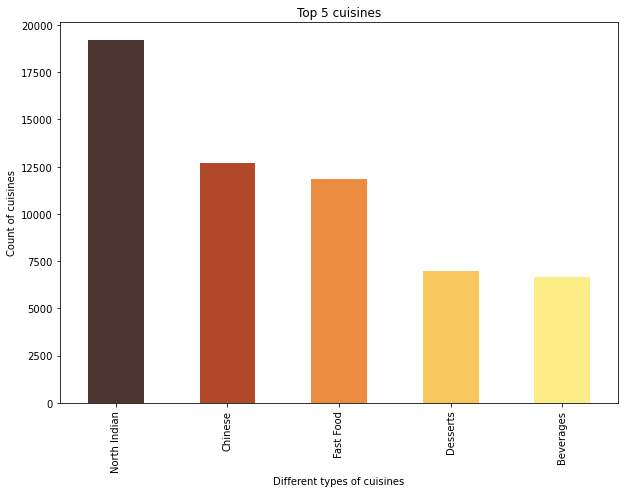

In [34]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())
print(cuisines.unique())
print(cuisines.value_counts())
(cuisines.value_counts()[:5]).plot(kind='bar', figsize=(10,7), color=['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86'])
plt.xlabel("Different types of cuisines")
plt.ylabel("Count of cuisines")
plt.title('Top 5 cuisines')

<AxesSubplot:title={'center':'Top 5 outlet offering North Indian and having maximum chains'}, xlabel="Outlet's name", ylabel='Number of outlets in different cities'>

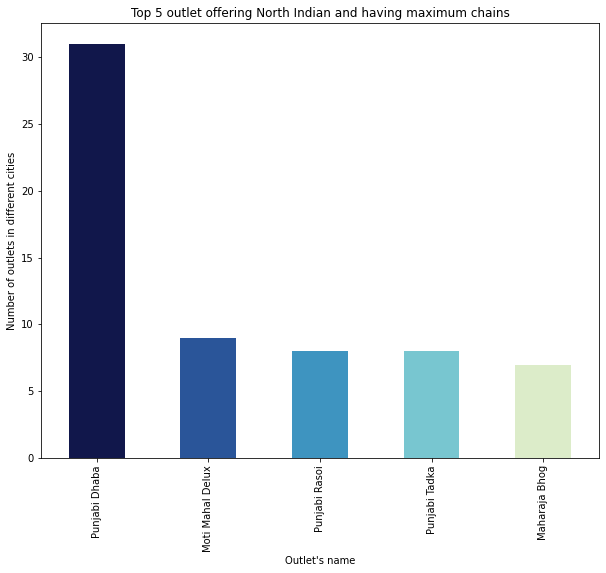

In [35]:
data.loc[data["cuisines"]=='North Indian','name'].value_counts()
(data.loc[data["cuisines"]=='North Indian','name'].value_counts()[:5]).plot(kind='bar', color=['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9'], title='Top 5 outlet offering North Indian and having maximum chains', xlabel="Outlet's name", ylabel='Number of outlets in different cities', figsize=(10,8))

In [37]:
print(data["timings"].nunique())
print(data["timings"].unique())
print(data["timings"].value_counts())

7697
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ...
 '6 PM to 11 PM (Mon-Thu), 5:30 PM to 11 PM (Fri-Sun)'
 '11:45AM to 3PM, 7PM to 10:45PM (Mon-Sun)'
 '10am – 3pm, 6pm – 2am (Mon-Sun)']
11 AM to 11 PM                                                           6955
10 AM to 10 PM                                                           1704
11 AM to 10 PM                                                           1422
10 AM to 11 PM                                                           1174
11 AM to 11 PM (Mon-Sun)                                                 1008
                                                                         ... 
10 AM to 5 PM, 7 PM to 11 PM (Mon, Wed-Sun), Tue Closed                     1
9am – 10pm (Mon-Sat),Closed (Sun)                                           1
11AM to 3PM, 7PM to 11PM (Mon, Tue, Wed, Fri, Sat, Sun), Closed (Thu)       1
12 Noon to 3 PM, 7 PM t

[  700   600   300  1000   400   500  1200  1600   250   200   150  1500
   800   450   850   350   900  6000   650   550  2500  6500  5500  4300
  3600  3500  3200  3000  2800  2000  1800  1400  1300  1250  1150  1100
  1050    50    60   100   750     0   220   260   950  1900  2400  2300
  2200  1700  1230    70   140   120   470    20    40   110    80    90
   440  2100 14000  5000  4500  4100  4000  3700  3400  2700  2600  1650
  1350   180  1260     2   197   312   170   240   330  3100  4200  1850
  3300  4800  3800  3250  2900  1750   282    35   149  1550  5100  6600
  1450   160  2250  8000  7000  3900  3650  1020   320   360   280   130
 15000  2501    30  1950  1875  1190   309 12000   380   299    45   190
  4600   880    75   620   999 10000   505 30000  4050   175   404   445
   640    15   420   115   444   592  1499   208   940   125  7500   520
   294]
145
200    6508
300    6313
400    5140
500    4682
100    4627
       ... 
309       1
380       1
299       1
45  

<AxesSubplot:>

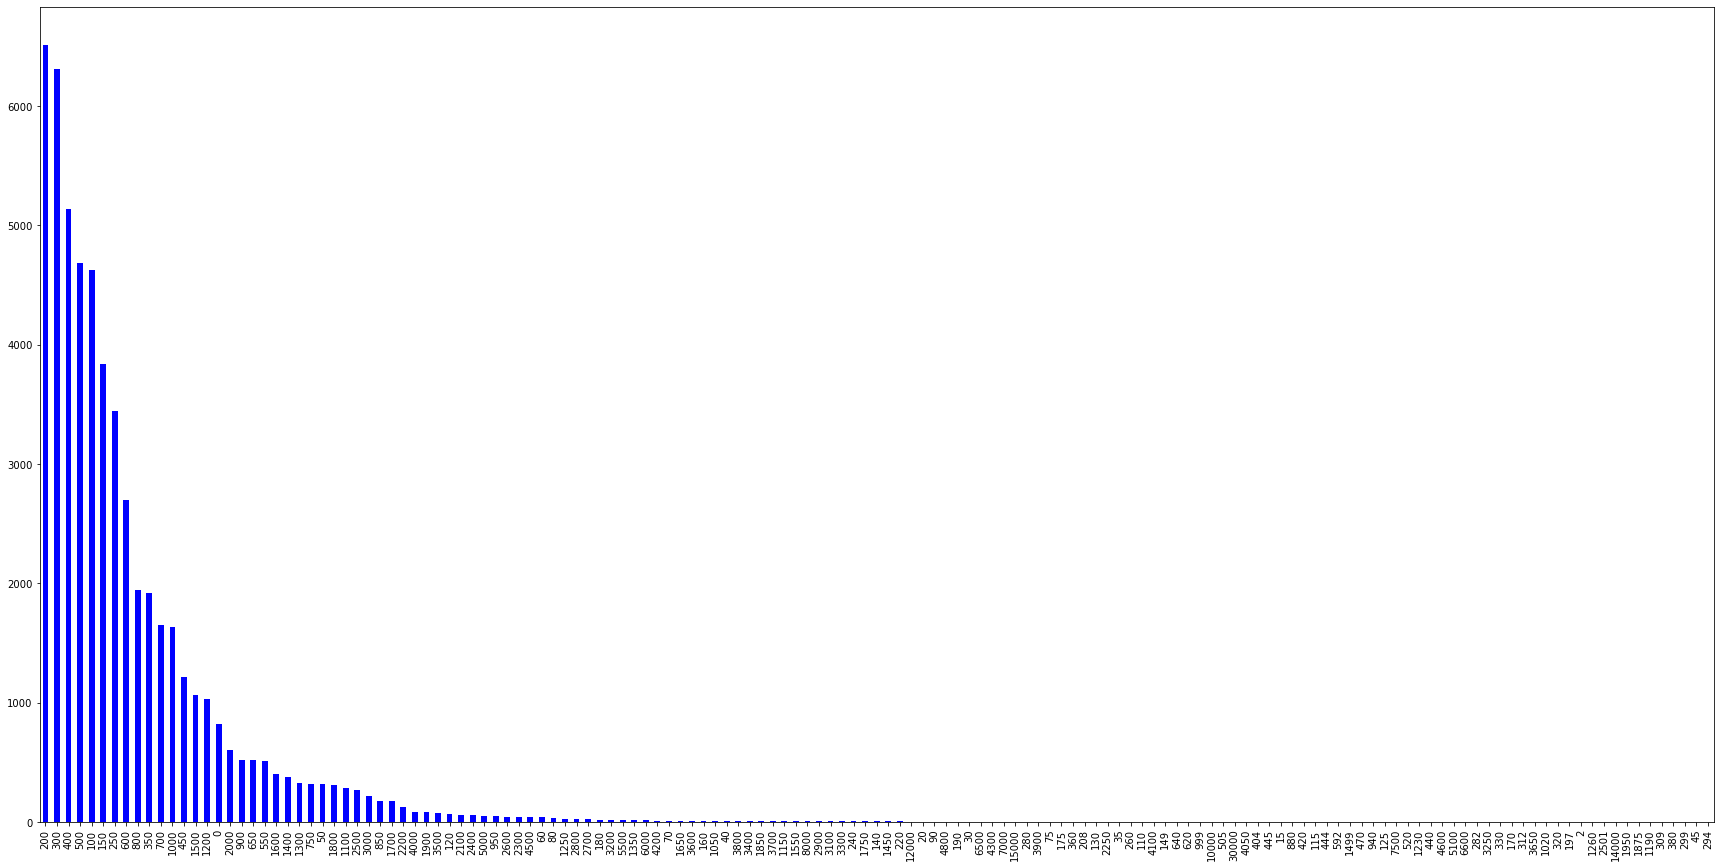

In [38]:
a=data["average_cost_for_two"].unique()
print(a)
print(data["average_cost_for_two"].nunique())
#print(data["average_cost_for_two"])
print(data["average_cost_for_two"].value_counts())
(data["average_cost_for_two"].value_counts()).plot(kind='bar', figsize=(30,15), color='blue')

In [39]:
print(sum(data["average_cost_for_two"])/len(data["average_cost_for_two"]))
print(min(data["average_cost_for_two"]))
print(max(data["average_cost_for_two"]))

530.1549889215793
0
30000


name
Ocean - The Private Dining Room - Sahara Star    30000.0
Bhairo                                           15000.0
Gol Bungalow - Taj Falaknuma Palace              15000.0
Fly Dining                                       14000.0
Trophy Bar- Umaid Bhawan Palace                  12000.0
Risala- Umaid Bhawan Palace                      12000.0
Pillars - Umaid Bhawan Palace                    12000.0
Wasabi By Morimoto - The Taj Mahal Palace        10000.0
Adaa - Taj Falaknuma Palace                       8000.0
The Kebab Shop - The Raj Palace                   8000.0
Name: average_cost_for_two, dtype: float64
136240    Mumbai
Name: city, dtype: object
136240    3.6
Name: aggregate_rating, dtype: float64


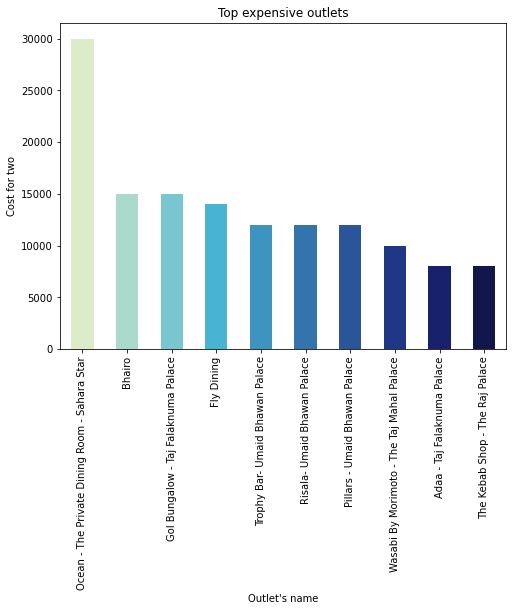

In [40]:
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)
print(data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False).head(10))
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)[:10].plot(kind='bar',title="Top expensive outlets", xlabel="Outlet's name", ylabel='Cost for two', color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b'], figsize=(8,6))
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','city'])
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','aggregate_rating'])

<AxesSubplot:xlabel='price range'>

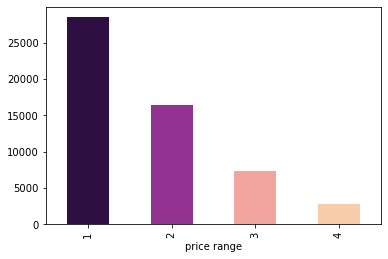

In [41]:
colors=["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
(data["price_range"].value_counts()).plot(kind='bar', color=colors, xlabel='price range')

city
Goa           2.770435
Varanasi      2.291595
Puducherry    2.223592
Mumbai        2.205737
Dehradun      2.188235
                ...   
Tirupati      1.253394
Kharagpur     1.173469
Jamnagar      1.112245
Amravati      1.089474
Junagadh      1.051546
Name: price_range, Length: 99, dtype: float64


<AxesSubplot:xlabel='city'>

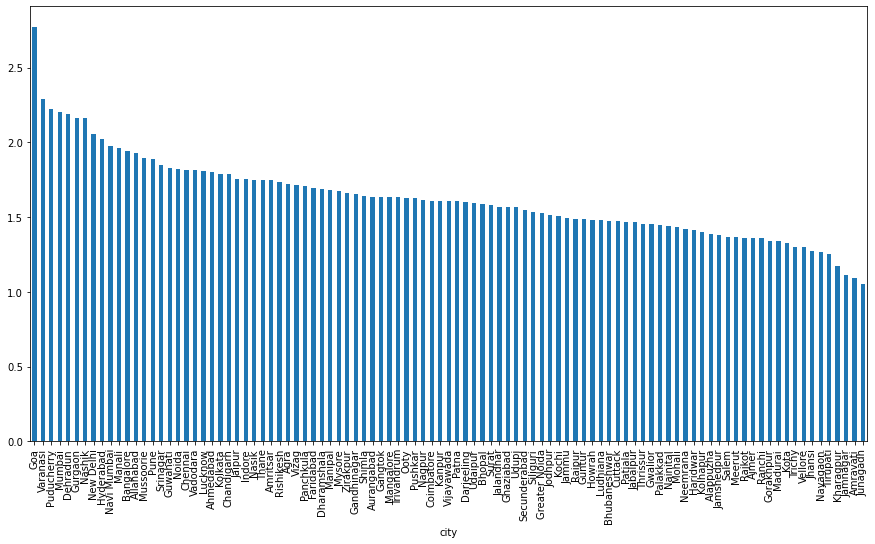

In [42]:
price_name= data.groupby('city').mean()['price_range'].sort_values(ascending=False)
print(price_name)
price_name.plot(kind='bar', figsize=(15,8))

price_range
1    2.601249
2    3.216162
3    3.496933
4    3.649107
Name: aggregate_rating, dtype: float64


<AxesSubplot:title={'center':'Average rating v/s Price range'}, xlabel='Price range', ylabel='Average of ratings'>

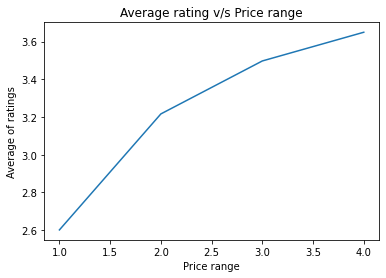

In [43]:
rating_price= data.groupby('price_range').mean()['aggregate_rating'].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='line', xlabel='Price range', ylabel='Average of ratings', title='Average rating v/s Price range')

In [44]:
print(data["price_range"].unique())
print(data["price_range"].nunique())
d1= (data.loc[data['price_range'] == 1, 'average_cost_for_two'])
print("when price_range is 1:",max(d1), min(d1))
d2= data.loc[data['price_range'] == 2, 'average_cost_for_two']
print("when price_range is 2:",max(d2), min(d2))
d3= data.loc[data['price_range'] == 3, 'average_cost_for_two']
print("when price_range is 3:", max(d3), min(d3))
d4= data.loc[data['price_range'] == 4, 'average_cost_for_two']
print("when price_range is 4:", max(d4), min(d4))


[2 1 3 4]
4
when price_range is 1: 450 0
when price_range is 2: 999 250
when price_range is 3: 1900 500
when price_range is 4: 30000 1000


price_range
1     216.525843
2     522.988473
3    1091.472249
4    2288.293781
Name: average_cost_for_two, dtype: float64


<AxesSubplot:title={'center':'Price range v/s Average cost for two'}, xlabel='Price range', ylabel='Average cost for two'>

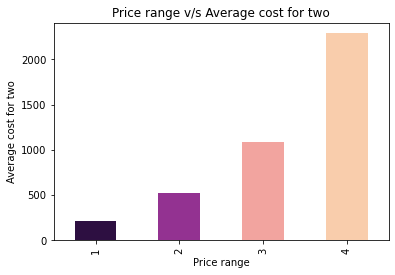

In [45]:
rating_price= data.groupby('price_range').mean()["average_cost_for_two"].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='bar', xlabel='Price range', ylabel='Average cost for two', title='Price range v/s Average cost for two', color=colors)

In [46]:
data['currency'].unique()

array(['Rs.'], dtype=object)

In [47]:
print(data['highlights'].unique())
print(data['highlights'].nunique())

["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Cash', 'Takeaway Available', 'No Alcohol Available', 'Dinner', 'Delivery', 'Credit Card', 'Lunch', 'Indoor Seating', 'Air Conditioned', 'Pure Veg']"
 "['Credit Card', 'Delivery', 'Cash', 'Lunch', 'Dinner', 'Debit Card', 'Air Conditioned', 'Indoor Seating']"
 "['Cash', 'Debit Card', 'Lunch', 'No Alcohol Available', 'Credit Card', 'Dinner', 'Takeaway Available', 'Indoor Seating', 'Air Conditioned', 'Digital Payments Accepted']"]
30971


In [48]:
print(data['rating_text'].unique())
print(data['rating_text'].nunique())
print(data['rating_text'].value_counts())

['Very Good' 'Excellent' 'Good' 'Average' 'Not rated' 'Poor'
 'Bardzo dobrze' 'Muito Bom' 'İyi' 'Çok iyi' 'Baik' 'Sangat Baik' 'Skvělé'
 'Muy Bueno' 'Průměr' 'Ortalama' 'Skvělá volba' 'Muito bom' 'Velmi dobré'
 'Excelente' 'Bom' 'Scarso' 'Promedio' 'Vynikajúce' 'Bueno' 'Dobré'
 'Terbaik' 'Harika' 'Veľmi dobré' 'Eccellente' 'Buono' 'Média' 'Dobrze']
33
Average          16132
Good             15807
Very Good        10856
Not rated         9994
Excellent         1609
Poor               575
Sangat Baik          9
Çok iyi              8
Bom                  7
Muito Bom            5
İyi                  5
Baik                 5
Velmi dobré          5
Buono                4
Dobré                4
Promedio             4
Skvělá volba         4
Průměr               4
Excelente            3
Muy Bueno            3
Skvělé               3
Vynikajúce           2
Terbaik              2
Veľmi dobré          2
Bardzo dobrze        2
Muito bom            1
Ortalama             1
Scarso               1
Bu

<AxesSubplot:>

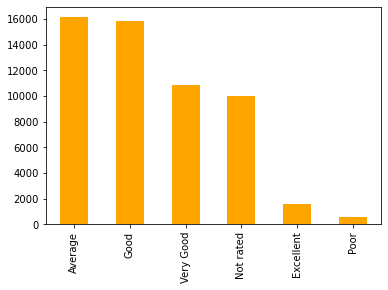

In [49]:
(data['rating_text'].value_counts()[:6]).plot(kind='bar', color='orange')

<AxesSubplot:>

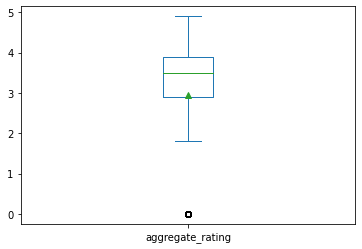

In [50]:
data['aggregate_rating'].sort_values(ascending=False).plot(kind='box', showmeans=True)

4              The Salt Cafe Kitchen & Bar
16                          Pinch Of Spice
22                          Pinch Of Spice
34                  Cafe Turquoise Cottage
36        Tea'se Me - Rooftop Tea Boutique
                        ...               
209393                            Le Privé
209401                         Cafe Fitoor
209572                      Juvenas Bakery
209573                       Infi Pizzeria
209580             Santushti Shakes & More
Name: name, Length: 939, dtype: object
939
Barbeque Nation                 44
AB's - Absolute Barbecues       19
Chili's Grill & Bar              9
Chili's American Grill & Bar     6
Onesta                           5
                                ..
Doodle's Garden                  1
Saladspoint                      1
Fourty Four                      1
Fat Cat Bistro                   1
Santushti Shakes & More          1
Name: name, Length: 766, dtype: int64


Text(0.5, 1.0, 'Top 10 high rated restaurant ')

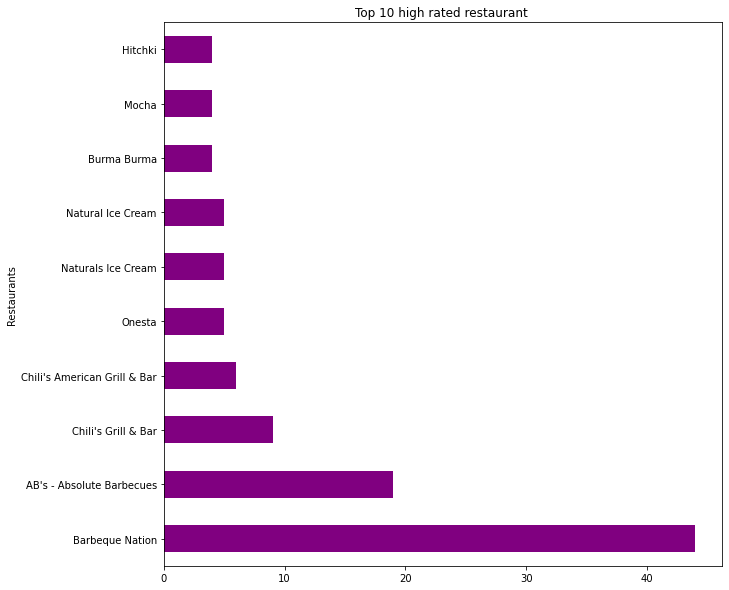

In [51]:
r1= (data.loc[data['aggregate_rating'] > 4.5, 'name'])
print(r1)
print(len(r1))
print(r1.value_counts())
((r1.value_counts()).head(10)).plot(kind='barh', color='purple', figsize=(10,10))
plt.ylabel("Restaurants")
plt.title("Top 10 high rated restaurant ")

0.0    9994
3.9    3502
3.8    3381
3.7    3282
4.0    3282
3.6    2966
3.2    2880
3.4    2748
3.3    2744
4.1    2735
3.5    2707
4.2    2192
3.1    1752
4.3    1612
3.0    1571
2.9    1471
2.8    1154
4.4    1070
2.7     856
4.5     682
2.6     570
4.6     428
2.5     396
2.4     300
4.7     239
2.3     167
4.8     142
4.9     130
2.2      65
2.1      28
2.0      10
1.9       4
1.8       2
Name: aggregate_rating, dtype: int64


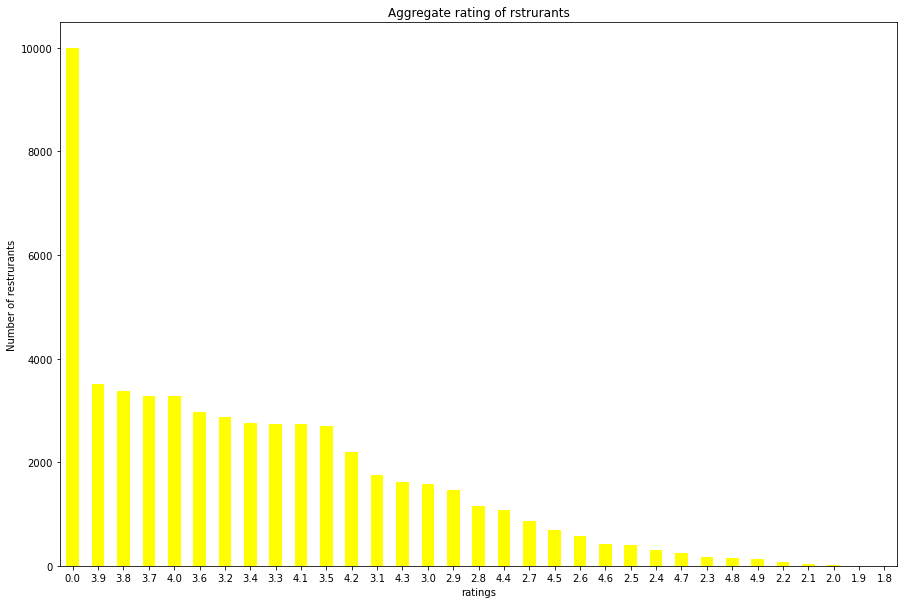

In [53]:
print(data['aggregate_rating'].value_counts())
(data['aggregate_rating'].value_counts()).plot(kind='bar', figsize=(15,10), rot=0, color=['yellow'])
plt.xlabel('ratings')
plt.ylabel('Number of restrurants')
plt.title("Aggregate rating of rstrurants")
plt.show()

In [54]:
data.groupby('name').mean()['aggregate_rating'].sort_values(ascending=False)

name
Purple Martini                              4.9
KAVERI Restaurant                           4.9
Girish Chandra Dey & Nakur Chandra Nandy    4.9
Kebabsville - Sayaji Hotel                  4.9
Traditional Khana                           4.9
                                           ... 
Hotel Pushpa Restaurant                     0.0
Shree Goodluck Punjabi & Chinese            0.0
Shree Govind Bhojnalaya                     0.0
Hotel RKS                                   0.0
Kannan's Snac Corner                        0.0
Name: aggregate_rating, Length: 40796, dtype: float64

In [55]:
data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
                  ...   
Darjeeling      0.961207
Pushkar         0.863190
Kharagpur       0.842857
Palakkad        0.546053
Alappuzha       0.379608
Name: aggregate_rating, Length: 99, dtype: float64

<AxesSubplot:title={'center':'Top rated city per outlet'}, xlabel='City', ylabel='average rating'>

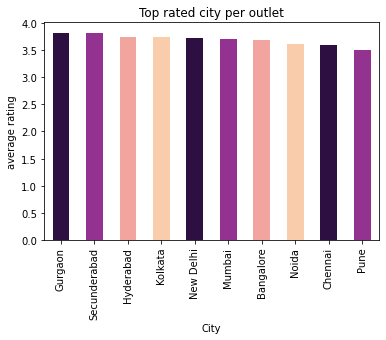

In [56]:
data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)[:10].plot(kind='bar', color=colors, title='Top rated city per outlet', xlabel='City', ylabel='average rating')

In [57]:
r2= (data.loc[data['aggregate_rating']<2 , 'rating_text'])
print(r2.value_counts())
#POOR RATING
r2_name= (data.loc[((data['rating_text']=='Poor') & (data['aggregate_rating']<2)), 'name'])
print(r2_name)
#MAX AND MIN RATING
print(data.loc[data['aggregate_rating']==5 , 'rating_text'])
print(max(data['aggregate_rating']))
print(min(data['aggregate_rating']))
print(data["aggregate_rating"].unique())
print(data["aggregate_rating"].nunique())

print(data.loc[data['aggregate_rating']==1.8 , 'name'])
print(data.loc[data['name']=='Alibi - Maya International Hotel' , 'city'])
print(data.loc[data['name']=='Chinese Garden Restaurant' , 'city'])
#AVERAGE RATING
print(sum(data['aggregate_rating'])/len(data['aggregate_rating']))



#print(data.loc[data['rating_text']==''])

Not rated    9994
Poor            6
Name: rating_text, dtype: int64
20030     Alibi - Maya International Hotel
39641                           Kaaraikudi
58228           Khandelwal Tiffin Services
58229                           China Wall
136156                         Club Escape
136540           Chinese Garden Restaurant
Name: name, dtype: object
Series([], Name: rating_text, dtype: object)
4.9
0.0
[4.4 4.2 4.3 4.9 4.  3.8 3.4 4.1 3.5 4.6 3.9 3.6 4.5 4.7 3.7 4.8 3.2 0.
 3.3 2.8 3.1 2.6 3.  2.7 2.9 2.2 2.3 2.4 2.5 2.1 1.8 2.  1.9]
33
20030     Alibi - Maya International Hotel
136540           Chinese Garden Restaurant
Name: name, dtype: object
20030    Bangalore
Name: city, dtype: object
136540    Mumbai
Name: city, dtype: object
2.957471577494422


In [58]:
print(data['votes'].unique())
print(data['votes'].nunique())
print(max(data['votes']))
print(data.loc[data['votes']==42539 , 'name'])
print(data.loc[data['votes']==42539 , 'city'])

print(min(data['votes']))
print(((data['votes'])<1).value_counts())
print(sum(data['votes'])/len(data['votes']))

[ 814 1203  801 ... 2001 1191 1583]
2644
42539
77763    Bawarchi
Name: name, dtype: object
77763    Hyderabad
Name: city, dtype: object
-18
False    50464
True      4598
Name: votes, dtype: int64
224.80454760088628


city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64
city
Palakkad     1.947368
Junagadh     1.427835
Alappuzha    0.815686
Kharagpur    0.469388
Name: votes, dtype: float64


<AxesSubplot:xlabel='city'>

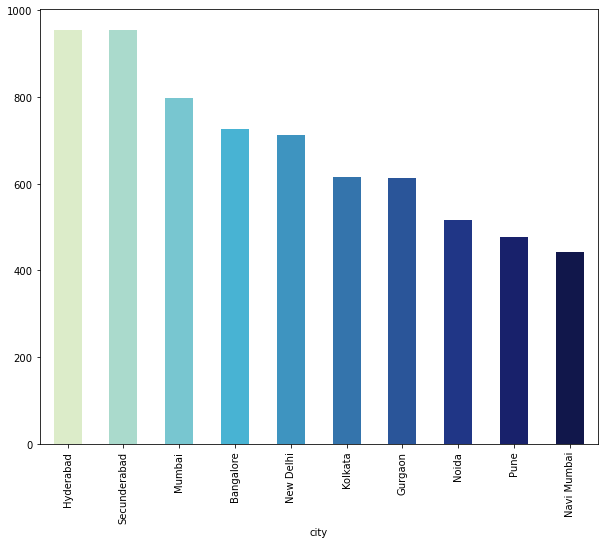

In [59]:
d1=data.groupby('city').mean()['votes'].sort_values(ascending=False)
print(d1.head(10))
print(d1.tail(4))
(data.groupby('city').mean()['votes'].sort_values(ascending=False)[:10]).plot(kind='bar',figsize=(10,8), color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b'])

In [60]:
data.groupby('name').mean()['votes'].sort_values(ascending=False)

name
Hauz Khas Social                  14751.0
Byg Brewski Brewing Company       13114.5
Peter Cat                         11856.0
Cafe Bahar                        10953.0
Big Pitcher                       10652.0
                                   ...   
Shivam Farshan                        0.0
Neha Dosa Corner                      0.0
Shivshakti Sweet and Farsan           0.0
Parihar Fast Food & Restaurant       -3.0
Vaishno The Cake Makers             -18.0
Name: votes, Length: 40796, dtype: float64

<AxesSubplot:title={'center':'Outlets have maximm votes'}, xlabel='Top 10 Outlets', ylabel='Average votes'>

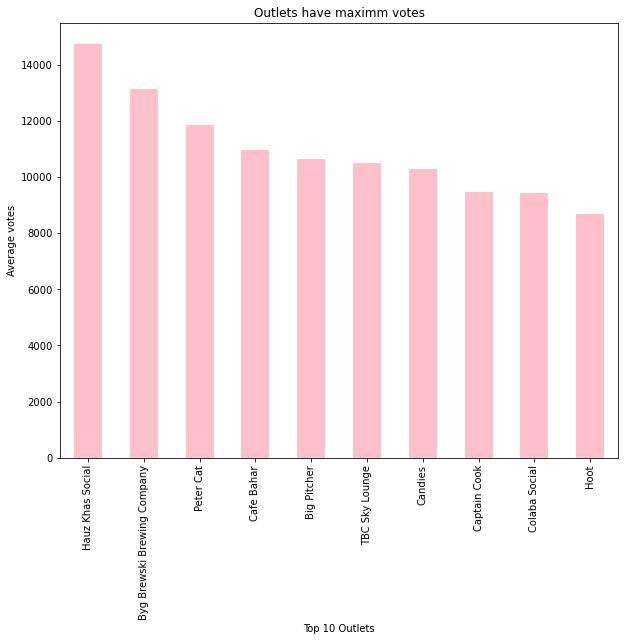

In [61]:
data.groupby('name').mean()['votes'].sort_values(ascending=False)[:10].plot(kind='bar', color='pink', figsize=(10,8), title="Outlets have maximm votes", xlabel='Top 10 Outlets', ylabel='Average votes')

In [62]:
data['photo_count'].value_counts()

0       10447
1        4167
2        2920
3        2259
4        1799
        ...  
1274        1
2100        1
2756        1
3049        1
828         1
Name: photo_count, Length: 2457, dtype: int64

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64
city
Jamnagar     1.048469
Alappuzha    0.866667
Amravati     0.473684
Kharagpur    0.051020
Name: photo_count, dtype: float64


<AxesSubplot:xlabel='city'>

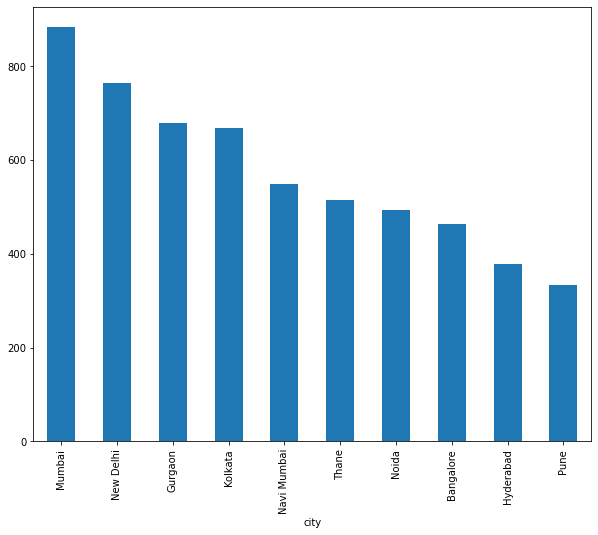

In [63]:
data.groupby('city').mean()['photo_count'].sort_values(ascending=False)
print(data.groupby('city').mean()['photo_count'].sort_values(ascending=False).head(10))
print(data.groupby('city').mean()['photo_count'].sort_values(ascending=False).tail(4))
(data.groupby('city').mean()['photo_count'].sort_values(ascending=False)[:10]).plot(kind='bar',figsize=(10,8))

name
Prankster                              17702.0
38 Barracks                            15545.0
JLWA                                   14250.0
Prithvi Cafe                           13763.0
Yeda Republic                          13060.0
                                        ...   
Dream Cream                                0.0
Roshan Vaishno Dhaba                       0.0
Roshni's Cakery                            0.0
Dream Bakers                               0.0
SKY LOUNGE (The Rooftop Restaurant)        0.0
Name: photo_count, Length: 40796, dtype: float64


<AxesSubplot:title={'center':'Top outlets have maximum photo count'}, xlabel='name'>

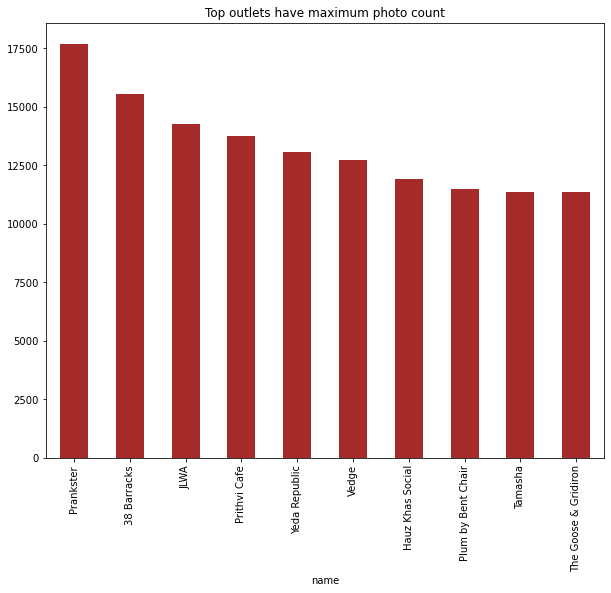

In [64]:
print(data.groupby('name').mean()['photo_count'].sort_values(ascending=False))
data.groupby('name').mean()['photo_count'].sort_values(ascending=False)[:10].plot(kind='bar',title='Top outlets have maximum photo count', figsize=(10,8), color='brown')

Conclusion

1)Domino's pizza,cafe coffe day, KFC, Baskin Robbins have the maximum number of outlets in India on zomato.
2)There are only 5% outlets who have more than 2 chains on zomato.
3)Approx 25% of restaurants have quick bites establishment and Domino's pizza's outlets has maximum quick bite establishment. Microbrewery establishment has the maximum rating.
4)Bangalore has the maximum number of outlets.
5)Mostly outlets has North Indian, chinese and fast food cuisine and very few outlets offers Internatinal,vegan, swedish and mandi cuisines.
6)Punjabi Dhada has maximum chain which offering North Indian cuisine.
7)The different outlets have different tinings but mostly fall into 10 am to 11 pm.
8)Maximum oulets offer the budget friendly cost of for two which lies between 200-900. Ocean - The Private Dining Room - Sahara Star located in has the maximum cost for two i.e., 30000.
9)The price range is corelated with rating and cost for two. As the cost for two increases, the chance of a restaurant having higher rating and price range increases.
10)Very less outlets have the poor rating, mostly fall in average rating.
11)he rating of mostly outlets lie between 3-4. Barbeque nation' s outlets has the maximum rating.
12)Gurgaon has highest rated restaurants whereas City hyderabad shows the maximum number votes per outlet and Mumbai has the maximum photo count.
13)Hauz khas social has the maximum average votes and the prankster has the maximum photo counts